# Data Science Foundations II Nanodegree Program
### Project 2: WeRateDogs - Data Wrangling
#### Student: Giulio Cesare Mastrocinque Santo


In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
from timeit import default_timer as timer
from PIL import Image
from io import BytesIO
import seaborn as sns
import wordcloud
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Gathering Data

In this project, data will be gathered from three different sources:
- A .csv file (twitter_archive_enhanced.csv) given in the course;
- Udacity's servers (URL:  https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv );
- Twitter API;

**A .csv file (twitter_archive_enhanced.csv) given in the course**

In [2]:
#Opening the .csv file and addressing it to a dataframe
twitter_archive = pd.read_csv("twitter_archive_enhanced.csv")

In [3]:
#Testing
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


**Udacity's servers (URL:  https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv )**

In [4]:
#File URL
image_predictions_url =( 
'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
#Calling Python resquests library
response = requests.get(image_predictions_url)

with open(os.path.join(os.getcwd(),image_predictions_url.split('/')[-1].replace("-","_")), mode='wb') as file:
    file.write(response.content)

In [6]:
#Addressing the .tsv downloaded file to a dataframe
image_predictions = pd.read_csv('image_predictions.tsv',sep='\t')

In [7]:
#Testing
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


**Twitter API**

**NOTICE**: uncommenting and runnining both cells bellow will run the twitter API and overwrite the tweet_json.txt file. To obtain the extact same results as mine, please use the file that is already on zip folder and that was obtained executing the code bellow.

In [8]:
#Creating a Twitter API
#consumer_key = 'SECRET'
#consumer_secret = 'SECRET'
#access_token = 'SECRET'
#access_secret = 'SECRET'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)


The code bellow was given by udacity:

In [9]:
#Writting API json data into tweet_json.txt file

#tweet_ids = twitter_archive.tweet_id.values
#count = 0
#fails_dict = {}
#start = timer()
## Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
#    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()

The tweet_json.txt will be read line by line as a json file and a dataframe will be created:

In [10]:
df_list = []

with open('tweet_json.txt', encoding='utf-8') as file:
    for i,line in enumerate(file):
        tweet = json.loads(line) #Read line as a json file
        df_list.append({'tweet_id':tweet['id'],
                        'retweet_count':tweet['retweet_count'],
                        'favorite_count':tweet['favorite_count']
                       })
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id','retweet_count','favorite_count'])  #Create dataframe

In [11]:
tweet_json.shape

(888, 3)

In [12]:
tweet_json.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8344,38139
1,892177421306343426,6166,32712
2,891815181378084864,4079,24626


### Assessing Data

In [13]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [14]:
twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1106,734787690684657664,NaN,NaN,2016-05-23 16:46:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is more successful than I will ever b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734787690...,13,10,None,None,None,None,None
508,812503143955202048,NaN,NaN,2016-12-24 03:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm happy to inform you all that Jake is in ex...,NaN,NaN,NaN,https://m.facebook.com/story.php?story_fbid=18...,13,10,None,None,None,None,None
2292,667160273090932737,NaN,NaN,2015-11-19 01:59:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradlay. He is a Ronaldinho Matsuyama ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667160273...,11,10,Bradlay,None,None,None,None


In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
sum(twitter_archive.name.isnull())

0

In [17]:
pd.options.display.max_colwidth = 500
twitter_archive[twitter_archive.name == "None"]['text']

5          Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7                              When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
12                                         Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
24                                                           You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
25                  This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
30                                                                  @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary go

In [18]:
twitter_archive.rating_numerator

0       13
1       13
2       12
3       13
4       12
5       13
6       13
7       13
8       13
9       14
10      13
11      13
12      13
13      12
14      13
15      13
16      12
17      13
18      13
19      13
20      12
21      13
22      14
23      13
24      13
25      12
26      13
27      13
28      13
29      12
        ..
2326     2
2327     7
2328     9
2329    11
2330     6
2331     8
2332    10
2333     9
2334     3
2335     1
2336    11
2337    10
2338     1
2339    11
2340     8
2341     9
2342     6
2343    10
2344     9
2345    10
2346     8
2347     9
2348    10
2349     2
2350    10
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2356, dtype: int64

In [19]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
twitter_archive.iloc[:,np.r_[5,10]];

In [21]:
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [22]:
twitter_archive[(twitter_archive['floofer'] != "None") & (twitter_archive['doggo'] != "None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None


In [23]:
twitter_archive['name'].str.extract(r'(^[aeiouAEIOU]$)',expand=False)[twitter_archive['name'].
                                                                           str.extract(r'(^[aeiouAEIOU]$)',
                                                                           expand=False).notnull()]

56      a
649     a
775     O
801     a
1002    a
1004    a
1017    a
1049    a
1193    a
1207    a
1340    a
1351    a
1361    a
1368    a
1382    a
1499    a
1737    a
1785    a
1853    a
1854    a
1877    a
1878    a
1923    a
1941    a
1955    a
1994    a
2034    a
2066    a
2116    a
2125    a
2128    a
2146    a
2153    a
2161    a
2191    a
2198    a
2211    a
2218    a
2222    a
2235    a
2249    a
2255    a
2264    a
2273    a
2287    a
2304    a
2311    a
2314    a
2327    a
2334    a
2347    a
2348    a
2350    a
2352    a
2353    a
2354    a
Name: name, dtype: object

In [24]:
twitter_archive['name'].str.extract(r'(^my$)',expand=False)[twitter_archive['name'].
                                                                           str.extract(r'(^my$)',
                                                                           expand=False).notnull()]

852    my
Name: name, dtype: object

In [25]:
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [26]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1300,752660715232722944,https://pbs.twimg.com/media/CnH87L6XYAAF7I_.jpg,2,goose,0.339324,False,English_setter,0.050512,True,basset,0.049093,True
444,674644256330530816,https://pbs.twimg.com/media/CVzRXmXWIAA0Fkr.jpg,1,soccer_ball,0.398102,False,basset,0.335692,True,cocker_spaniel,0.072941,True
273,670832455012716544,https://pbs.twimg.com/media/CU9GjzrUkAAWPh4.jpg,1,malinois,0.317607,True,Norwegian_elkhound,0.274901,True,bathing_cap,0.114643,False
1208,742385895052087300,https://pbs.twimg.com/media/Ck18CFcXIAAUWoy.jpg,1,Cardigan,0.566911,True,Border_collie,0.117566,True,Appenzeller,0.047664,True
1265,749317047558017024,https://pbs.twimg.com/ext_tw_video_thumb/749316899712950272/pu/img/nvZI9mkoAxt89sul.jpg,1,wire-haired_fox_terrier,0.155144,True,Lakeland_terrier,0.108382,True,buckeye,0.074617,False


In [27]:
sum(image_predictions.p1.isnull())

0

In [28]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8344,38139
1,892177421306343426,6166,32712
2,891815181378084864,4079,24626
3,891689557279858688,8485,41485
4,891327558926688256,9177,39650


In [30]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 3 columns):
tweet_id          888 non-null int64
retweet_count     888 non-null int64
favorite_count    888 non-null int64
dtypes: int64(3)
memory usage: 20.9 KB


In [31]:
sum(tweet_json.retweet_count.isnull())

0

In [32]:
sum(tweet_json.favorite_count.isnull())

0

During assessing, the following issues were chosen for cleaning in this project:

#### Quality
##### `twitter_archive` table:
- Inaccurate attribute labels (Ex.: text, name, timestamp);
- Words such as "a", "o", "my" being identified as a dog name;
- Erroneous datatype for timestamp attribute;
- Unknown values are represented by "None" in Name, doggo, floofer, pupper and puppo;
- Wrong rating_numerators values (ex: index 2335 from `twitter_archive` table);
- Rating denominators with values different than 10;
- Some tweets are not original posts (they are retweets) and must be excluded;
- Some columns are not necessary for analyses and visualization purposes. Ex.: in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls;


##### `image_predictions` table:
- Some predictions didn't recognize a dog, but anything else;
- Inappropriate attribute names (p1, p2, etc);
- Lowercase and uppercase inconsistency in dog breeds names;
- Dog breeds names with "_" separator;

##### `tweet_json` table:
- Erroneous datatype for retweet_count and favorite_count

#### Tidiness
- Doggo, floofer, pupper and puppo are values, not attributes. They should be in a single column;
- Inconsistent dataframe sizes provided that some tweets were removed from twitter;
- Attributes retweet_count and favorite_count from `tweet_json` table should be in `twitter_archive` table and then `tweet_json` could be deleted;
- p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf and p3_dog attributes from `image_predictions` should be reduce into two columns: dog breed (if exists) and its prediction confidence value (for the highest value). 
- Two different dataframes should exist: one relative to the twitter tweets (twitter_archive_clean) and another one with all the dogs informations. The `image_predictions` table can be used as the second dataframe changing its name to `dogs_data`. Moreover, attributes "name", "dog_stage", "rating_numerator" and "rating_denominator" from `twitter_archive` should be transfered to `dogs_data` since they are relative to the dogs.


### Cleaning Data

A copy of the dataframes is first created:

In [33]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

Before cleaning the Tidness problems, a few quality issues will be addressed first to make the dataframe easear to manipulate

#### `twitter_archive` : Some tweets are not original posts (they are retweets) and must be excluded

##### Define

Take only rows in wich the retweeted_status_id is null, meaning that the post is not a retweet.

##### Code

In [34]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull() == True]

##### Test

In [35]:
twitter_archive_clean.shape

(2175, 17)

#### `twitter_archive` : Some columns are not necessary for analyses and visualization purposes. Ex.: in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls;

##### Define

Remove columns 'in_reply_to_status_id', 'in_reply_to_user_id','source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' and 'expanded_urls' using the method **drop** from pandas.

#### Code

In [36]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','source',
                                                    'retweeted_status_id','retweeted_status_user_id',
                                                    'retweeted_status_timestamp',
                                                    'expanded_urls'],axis=1)

##### Test

In [37]:
display(twitter_archive_clean.head())
display(twitter_archive_clean.shape)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None


(2175, 10)

### Tidness

#### Doggo, floofer, pupper and puppo are values, not attributes. They should be in a single column

##### Define

Join attributes doggo, floofer, pupper and puppo into a single column using **melt** method from pandas. Remove the extra "value" column created by the function. Delete resulting duplicated ids.

##### Code

In [38]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id','timestamp',
                                                                'text','rating_numerator',
                                                                'rating_denominator','name'],
                                var_name='dog_stage',value_name='stages_values')
twitter_archive_clean = twitter_archive_clean.drop('stages_values', axis=1)
twitter_archive_clean.drop_duplicates('tweet_id',inplace=True)

##### Test

In [39]:
display(twitter_archive_clean.sample(10))
display(twitter_archive_clean.shape)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
2112,667152164079423490,2015-11-19 01:27:25 +0000,This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://t.co/h9R0EwKd9X,12,10,Pipsy,doggo
1092,709409458133323776,2016-03-14 16:02:49 +0000,This is Billy. He sensed a squirrel. 8/10 damn it Billy https://t.co/Yu0K98VZ9A,8,10,Billy,doggo
1763,673711475735838725,2015-12-07 03:51:47 +0000,🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10 https://t.co/MTOOksRzvH,10,10,None,doggo
1061,712092745624633345,2016-03-22 01:45:15 +0000,This is Steven. He's inverted af. Also very helpful. Scans anything you want for free. Takes him a while tho. 7/10 https://t.co/tA0ZiQ7JcG,7,10,Steven,doggo
1062,712085617388212225,2016-03-22 01:16:55 +0000,Say hello to Olive and Ruby. They are best buddies. Both 11/10 \n1 like = 1 buddy https://t.co/yagmFdKlyL,11,10,Olive,doggo
1261,696886256886657024,2016-02-09 02:40:05 +0000,Guys I found the dog from Up. 12/10 https://t.co/WqoZtX9jmJ,12,10,None,doggo
1301,693486665285931008,2016-01-30 17:31:20 +0000,This is Lincoln. He doesn't understand his new jacket. 11/10 please enjoy (vid by @GraceIsTheName8) https://t.co/S6cQsIoX27,11,10,Lincoln,doggo
2000,669006782128353280,2015-11-24 04:17:01 +0000,This is Tucker. He is 100% ready for the sports. 12/10 I would watch anything with him https://t.co/k0ddVUWTcu,12,10,Tucker,doggo
530,791672322847637504,2016-10-27 16:06:04 +0000,When she says you're a good boy and you know you're a good boy because you're a good boy. 13/10 https://t.co/O5IUmRHRIh,13,10,None,doggo
2168,666051853826850816,2015-11-16 00:35:11 +0000,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,2,10,an,doggo


(2175, 7)

#### Attributes retweet_count and favorite_count from `tweet_json` table should be in `twitter_archive` table and then `tweet_json` could be deleted

##### Define

Merge twitter_archive_clean and tweet_json_clean tables keeping all the content of the twitter_archive_clean table (left merge).

##### Code

In [40]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean,
                                 on=['tweet_id'], how='left')

##### Test

In [41]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,doggo,8344.0,38139.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,doggo,6166.0,32712.0


#### p1, p1_conf, pi_dog, p2, p2_conf, p2_dog, p3, p3_conf and p3_dog should be reduce into two columns: dog breed (if exists) and its prediction confidence value (for the highest value).

#### Two different dataframes should exist: one relative to the twitter tweets (twitter_archive_clean) and another one with all the dogs informations. The "image_predictions" table can be used as the second dataframe changing its name to "dogs_data". Moreover, attributes "name", "dog_stage", "rating_numerator" and "rating_denominator" from "twitter_archive" should be transfered to "dogs_data" since they are relative to the dogs.

#### `image_predictions`: Some predictions didn't recognize a dog, but anything else
#### `image_predictions`: Inappropriate attribute names (p1, p2, etc)

##### Define

Extract the highest prediction confidence value for each row and verify if its corresponding prediction is a dog breed. If it is not, take the second highest prediction confidence and do the same. If the second best prediction is not also a dog, test the third prediction. If all predictions failed to identify a dog, assign the value "Unknown" as the dog breed. 

Create two different lists: dog_breed_prediction, with the obtained dog breeds and dog_breed_confidence, with the corresponding prediction confidence value.

Create dogs_data table from image_predictions containing the attributes tweet_id, dog_name, dog_picture_url, dog_breed_prediction, dog_breed_prediction_confidence and dog_stage

##### Code

In [42]:
#dog_breed and dog_breed_confidence will be new attributes in the image_predictions_clean dataframe
dog_breed = []
dog_breed_confidence = []

#The following code iterate over the dataframe and take the dog breed (if it exists) with highest confidence value.
#Results are inputed into the lists dog_breed and dog_breed_confidence

for index, row in image_predictions_clean.iterrows():
    
    confidence_values = [] #ordered confidence values from in a row [p1_conf, p2_conf, p3_conf]
    isdog = [] #ordered boolean values about the classification being or not a dog [p1_dog, p2_dog, p3_dog]
    attributes = ['p1','p2','p3'] #ordered attribute labels [p1, p2, p3]
    
    #For each line of the datafram, update the lists confidence_values and isdog
    confidence_values.append(row.p1_conf)
    confidence_values.append(row.p2_conf)
    confidence_values.append(row.p3_conf)
    isdog.append(row.p1_dog)
    isdog.append(row.p2_dog)
    isdog.append(row.p3_dog)
    
    #If the classification with the highest score is about a dog, add it to the list dog_breed and its corresponding
    #confidence value to the list dog_breed_confidence. If not, delete this element from the confidence_values,
    #isdog and attribute lists and do the same procedure for the remaining two items. If the highest score between
    #the remaining two items is about a dog, add it to the list dog_breed. If it is not a dog, delete it 
    #and verify the last element. If none of the three classifications are a dog, the name unknown is given to dog_breed
    #and 0 is given to its confidence
    
    if isdog[confidence_values.index(max(confidence_values))]: #first maximum verification
        dog_breed.append(row[attributes[confidence_values.index(max(confidence_values))]])
        dog_breed_confidence.append(max(confidence_values))
    else: #first classification with maximum confidence is not about a dog
        del attributes[confidence_values.index(max(confidence_values))]
        del confidence_values[confidence_values.index(max(confidence_values))]
        del isdog[confidence_values.index(max(confidence_values))]
        if isdog[confidence_values.index(max(confidence_values))]: #second maximum verification
            dog_breed.append(row[attributes[confidence_values.index(max(confidence_values))]])
            dog_breed_confidence.append(max(confidence_values))
        else: #second classification with maximum confidence is not about a dog
            del attributes[confidence_values.index(max(confidence_values))]
            del confidence_values[confidence_values.index(max(confidence_values))]
            del isdog[confidence_values.index(max(confidence_values))]
            if isdog[confidence_values.index(max(confidence_values))]: #third maximum verification
                dog_breed.append(row[attributes[confidence_values.index(max(confidence_values))]])
                dog_breed_confidence.append(max(confidence_values))
            else: #third (and none) classification with maximum confidence is not about a dog
                dog_breed.append("Unknown")
                dog_breed_confidence.append(0)

#Include dob_breed and dog_breed_confidence as attributes of image_predictions_clean
image_predictions_clean['dog_breed_prediction'] = dog_breed
image_predictions_clean['dog_breed_prediction_confidence'] = dog_breed_confidence


#Remove undesired p1, p1_conf, ..., p3_dog columns from image_predictions_clean
image_predictions_clean.drop(['img_num','p1','p1_conf','p1_dog',
                              'p2','p2_conf','p2_dog',
                              'p3','p3_conf','p3_dog'],axis=1,inplace=True)

#Create datafrabe dogs_data
dogs_data = image_predictions_clean.copy()
new_dogs_data_labels = ['tweet_id','dog_picture_url','dog_breed_prediction','dog_breed_prediction_confidence']
dogs_data.columns = new_dogs_data_labels

#Transfer attributes "name", dog_stage", "rating_numerator" and "rating_denominator" to dogs_data dataframe
#NOTE: a right merge will be done to keep track of all the tweet ids that were obtained through the API
dogs_data = pd.merge(dogs_data, twitter_archive_clean,
                                 on=['tweet_id'], how='right')

#Remove unecessary attributes from dogs_data that came in the merging process.
#NOTE: retweet_count won't be removed yet to keep track of the IDs that came from the twitter API.
#That will be usefull for later cleaning procedures
dogs_data.drop(['timestamp','text',
                'favorite_count'],axis=1,inplace = True)

#Remove attributes "name", dog_stage", "rating_numerator" and "rating_denominator"
#from twitter_archive_clean dataframe
twitter_archive_clean.drop(['name','dog_stage','rating_numerator','rating_denominator'],axis=1,inplace = True)

##### Test

In [43]:
display(twitter_archive_clean.head(2))
display(dogs_data.head(2))

,tweet_id,timestamp,text,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8344.0,38139.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6166.0,32712.0


,tweet_id,dog_picture_url,dog_breed_prediction,dog_breed_prediction_confidence,rating_numerator,rating_denominator,name,dog_stage,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,8,10,None,doggo,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,7,10,a,doggo,NaN


#### Inconsistent dataframes sizes provided that some tweets were removed from twitter
#### `twitter_archive` : Unknown values are represented by "None" in Name, doggo, floofer, pupper and puppo;
**Note that Name, doggo, floofer, pupper and puppo are now in dogs_data table**

##### Define

Remove all posts that doesn't exist anymore on twitter. That can be done deleting rows in which retweet_count is null, because retweet_count is an attribute extracted from the tweepy API. 

Fill all NaN jpg_url with a null string ""

Fill all the NaN dog breeds with the value "Unknown"

Fill all the NaN dog breed confidence values with 0

Replace None values by "Uknown"

##### Code

In [44]:
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.retweet_count.isnull()]
dogs_data = dogs_data[~dogs_data.retweet_count.isnull()]

#Removing retweet_count from dogs_data dataframe
dogs_data.drop(['retweet_count'],axis=1,inplace = True)

In [45]:
dogs_data.dog_picture_url.fillna("",inplace=True)
dogs_data.dog_breed_prediction.fillna("Unknown",inplace=True)
dogs_data.dog_breed_prediction_confidence.fillna(0,inplace=True)
dogs_data.dog_stage = dogs_data.dog_stage.str.replace("None","Unknown")
dogs_data.name = dogs_data.name.str.replace("None","Unknown")
dogs_data.reset_index(inplace=True,drop=True)

##### Test

In [46]:
dogs_data.head()

,tweet_id,dog_picture_url,dog_breed_prediction,dog_breed_prediction_confidence,rating_numerator,rating_denominator,name,dog_stage
0,746790600704425984,https://pbs.twimg.com/media/Cl0iFdeXEAQtPyT.jpg,Boston_bull,0.936183,10,10,Unknown,doggo
1,758828659922702336,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,Chesapeake_Bay_retriever,0.480048,13,10,Unknown,doggo
2,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,Old_English_sheepdog,0.023791,11,10,Lilli,doggo
3,759047813560868866,https://pbs.twimg.com/media/Coit84_VYAEMtLi.jpg,Labrador_retriever,0.778546,11,10,Spencer,doggo
4,759099523532779520,https://pbs.twimg.com/media/Cojc_Q0WcAAqi_K.jpg,Shetland_sheepdog,0.129034,7,10,Toby,doggo


### Quality

#### `twitter_archive`: Erroneous datatype for timestamp
#### `tweet_json`: Erroneous datatype for retweet_count and favorite_count
**Note that retweet_count and favorite_count are now attributes from twitter_archive table**

##### Define

Change the datatype of the column timestamp of twitter_archive_clean table using pd.to_datetime method.

Change the datatype of the columns retweet_count and favorite_count of twitter_archive_clean table using astype method.

##### Code

In [47]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.astype(int)
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.astype(int)

##### Test

In [48]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 843
Data columns (total 5 columns):
tweet_id          732 non-null int64
timestamp         732 non-null datetime64[ns]
text              732 non-null object
retweet_count     732 non-null int64
favorite_count    732 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 34.3+ KB


#### `twitter_archive`: Inaccurate attribute labels (Ex.: text, name, timestamp)
**Note that some columns are now in dogs_data table because of tidness cleaning**

##### Define

Create a string of labels and assigne it to twitter_archive_clean dataframe

Repeat the procedure for the dogs_data table

##### Code

In [49]:
new_labels_twitter_archive = ['tweet_id','tweet_date','tweet_text','number_of_retweets','number_of_likes']
twitter_archive_clean.columns = new_labels_twitter_archive

new_labels_dogs_data = ['tweet_id','dog_picture_url','dog_breed_prediction','dog_breed_prediction_confidence',
                        'dog_rating_numerator','dog_rating_denominator','dog_name','dog_stage']
dogs_data.columns = new_labels_dogs_data

##### Test

In [50]:
display(dogs_data.head(1))
display(twitter_archive_clean.head(1))

,tweet_id,dog_picture_url,dog_breed_prediction,dog_breed_prediction_confidence,dog_rating_numerator,dog_rating_denominator,dog_name,dog_stage
0,746790600704425984,https://pbs.twimg.com/media/Cl0iFdeXEAQtPyT.jpg,Boston_bull,0.936183,10,10,Unknown,doggo


,tweet_id,tweet_date,tweet_text,number_of_retweets,number_of_likes
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8344,38139


#### `twitter_archive`: Wrong rating_numerators (ex: index 2335 from `twitter_archive` table)
**Note that rating_numerator attribute is now in dogs_data table **

##### Define

Extract the rating values using string extraction and Regular Expressions for the tweet texts in the twitter_archive_clean table.

Split the rating values into its corresponding numerator and denominator. Update the corresponding attributes 'rating_numerator' and 'rating_denominator' with those values in the dogs_data table.

##### Code

In [51]:
num = []
den = []
tweet_text = twitter_archive_clean.tweet_text
rating = tweet_text.str.extract(r'(\d+\/\d+)', expand=False)
for element in rating:
    numerator, denominator = element.split('/')
    num.append(numerator)
    den.append(denominator)

dogs_data['dog_rating_numerator'] = num
dogs_data['dog_rating_denominator'] = den

##### Test

In [52]:
dogs_data.head()

,tweet_id,dog_picture_url,dog_breed_prediction,dog_breed_prediction_confidence,dog_rating_numerator,dog_rating_denominator,dog_name,dog_stage
0,746790600704425984,https://pbs.twimg.com/media/Cl0iFdeXEAQtPyT.jpg,Boston_bull,0.936183,13,10,Unknown,doggo
1,758828659922702336,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,Chesapeake_Bay_retriever,0.480048,13,10,Unknown,doggo
2,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,Old_English_sheepdog,0.023791,12,10,Lilli,doggo
3,759047813560868866,https://pbs.twimg.com/media/Coit84_VYAEMtLi.jpg,Labrador_retriever,0.778546,13,10,Spencer,doggo
4,759099523532779520,https://pbs.twimg.com/media/Cojc_Q0WcAAqi_K.jpg,Shetland_sheepdog,0.129034,12,10,Toby,doggo


#### `twitter_archive`: Rating Denominators different than 10
**Note that rating_denominator attribute is now in dogs_data table **

Substitute all "rating_denominator" values by 10.

##### Code

In [53]:
den = [10]*len(dogs_data['dog_rating_numerator'])
dogs_data['dog_rating_denominator'] = den

##### Test

In [54]:
dogs_data['dog_rating_denominator'].value_counts()

10    732
Name: dog_rating_denominator, dtype: int64

#### `twitter_archive`: Words such as "a", "o" and "my" being identified as a dog name
**Note that the dog name is now an attribute of dogs_data table **

##### Define

Extract the row index of the "a", "o" and "my" occurrences using Regular Expressions for the dogs name in dogs_data dataframe.

Check the tweet text for each case and fix each of the names when possible.

##### Code

In [55]:
dogs_data['dog_name'].str.extract(r'(^[aeiouAEIOU]$)',expand=False)[dogs_data['dog_name'].
                                                                           str.extract(r'(^[aeiouAEIOU]$)',
                                                                           expand=False).notnull()]

78     a
99     O
188    a
611    a
Name: dog_name, dtype: object

In [56]:
dogs_data['dog_name'].str.extract(r'(^my$)',expand=False)[dogs_data['dog_name'].str.extract(r'(^my$)',
                                                                                expand=False).notnull()]

38    my
Name: dog_name, dtype: object

In [57]:
display(dogs_data.iloc[[78]])
display(dogs_data.iloc[[99]])
display(dogs_data.iloc[[188]])
display(dogs_data.iloc[[611]])
display(dogs_data.iloc[[38]])

display(twitter_archive_clean[twitter_archive_clean.tweet_id == 772581559778025472])
display(twitter_archive_clean[twitter_archive_clean.tweet_id == 776201521193218049])
display(twitter_archive_clean[twitter_archive_clean.tweet_id == 792913359805018113])
display(twitter_archive_clean[twitter_archive_clean.tweet_id == 881536004380872706])
display(twitter_archive_clean[twitter_archive_clean.tweet_id == 765395769549590528])

,tweet_id,dog_picture_url,dog_breed_prediction,dog_breed_prediction_confidence,dog_rating_numerator,dog_rating_denominator,dog_name,dog_stage
78,772581559778025472,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,Newfoundland,0.574345,13,10,a,doggo


,tweet_id,dog_picture_url,dog_breed_prediction,dog_breed_prediction_confidence,dog_rating_numerator,dog_rating_denominator,dog_name,dog_stage
99,776201521193218049,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,Rottweiler,0.502228,13,10,O,doggo


,tweet_id,dog_picture_url,dog_breed_prediction,dog_breed_prediction_confidence,dog_rating_numerator,dog_rating_denominator,dog_name,dog_stage
188,792913359805018113,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,Unknown,0.0,11,10,a,doggo


,tweet_id,dog_picture_url,dog_breed_prediction,dog_breed_prediction_confidence,dog_rating_numerator,dog_rating_denominator,dog_name,dog_stage
611,881536004380872706,https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg,Samoyed,0.281463,10,10,a,doggo


,tweet_id,dog_picture_url,dog_breed_prediction,dog_breed_prediction_confidence,dog_rating_numerator,dog_rating_denominator,dog_name,dog_stage
38,765395769549590528,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,Pembroke,0.509491,14,10,my,doggo


,tweet_id,tweet_date,tweet_text,number_of_retweets,number_of_likes
647,772581559778025472,2016-09-04 23:46:12,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,1842,6894


,tweet_id,tweet_date,tweet_text,number_of_retweets,number_of_likes
625,776201521193218049,2016-09-14 23:30:38,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,2757,10242


,tweet_id,tweet_date,tweet_text,number_of_retweets,number_of_likes
524,792913359805018113,2016-10-31 02:17:31,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,4429,15401


,tweet_id,tweet_date,tweet_text,number_of_retweets,number_of_likes
53,881536004380872706,2017-07-02 15:32:16,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,15684,48661


,tweet_id,tweet_date,tweet_text,number_of_retweets,number_of_likes
689,765395769549590528,2016-08-16 03:52:26,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,3684,28061


In [58]:
dogs_data.at[78, 'dog_name'] = 'Unknown'
dogs_data.at[99, 'dog_name'] = 'Unknown'
dogs_data.at[188, 'dog_name'] = "O'Malley"
dogs_data.at[611, 'dog_name'] = "Unknown"
dogs_data.at[38, 'dog_name'] = "Zoey"


##### Test

In [59]:
display(dogs_data.iloc[[78]])
display(dogs_data.iloc[[99]])
display(dogs_data.iloc[[188]])
display(dogs_data.iloc[[611]])
display(dogs_data.iloc[[38]])

,tweet_id,dog_picture_url,dog_breed_prediction,dog_breed_prediction_confidence,dog_rating_numerator,dog_rating_denominator,dog_name,dog_stage
78,772581559778025472,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,Newfoundland,0.574345,13,10,Unknown,doggo


,tweet_id,dog_picture_url,dog_breed_prediction,dog_breed_prediction_confidence,dog_rating_numerator,dog_rating_denominator,dog_name,dog_stage
99,776201521193218049,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,Rottweiler,0.502228,13,10,Unknown,doggo


,tweet_id,dog_picture_url,dog_breed_prediction,dog_breed_prediction_confidence,dog_rating_numerator,dog_rating_denominator,dog_name,dog_stage
188,792913359805018113,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,Unknown,0.0,11,10,O'Malley,doggo


,tweet_id,dog_picture_url,dog_breed_prediction,dog_breed_prediction_confidence,dog_rating_numerator,dog_rating_denominator,dog_name,dog_stage
611,881536004380872706,https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg,Samoyed,0.281463,10,10,Unknown,doggo


,tweet_id,dog_picture_url,dog_breed_prediction,dog_breed_prediction_confidence,dog_rating_numerator,dog_rating_denominator,dog_name,dog_stage
38,765395769549590528,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,Pembroke,0.509491,14,10,Zoey,doggo


#### `image_predictions`: Lowercase and uppercase inconsistency in dog breeds names
#### `image_predictions`: Dog breeds names with "_" separator
**Note that those attributes are now in dogs_data table **

Replace the underline symbol "_" by a white space " " using str.replace method.

Assign capital letters for all begining words using str.title() method.

##### Code

In [60]:
dogs_data['dog_breed_prediction'] = dogs_data['dog_breed_prediction'].str.replace("_"," ")
dogs_data['dog_breed_prediction'] = dogs_data['dog_breed_prediction'].str.title()

##### Test

In [61]:
dogs_data['dog_breed_prediction'].unique()

array(['Boston Bull', 'Chesapeake Bay Retriever', 'Old English Sheepdog',
       'Labrador Retriever', 'Shetland Sheepdog', 'Kuvasz',
       'Golden Retriever', 'Sussex Spaniel', 'Unknown', 'Samoyed',
       'Blenheim Spaniel', 'French Bulldog', 'Standard Poodle',
       'Norwegian Elkhound', 'Gordon Setter', 'Chow', 'Kelpie',
       'Miniature Poodle', 'Malamute', 'German Shepherd',
       'Bernese Mountain Dog', 'Dalmatian', 'Pembroke', 'Beagle',
       'Welsh Springer Spaniel', 'Redbone', 'Toy Poodle', 'Keeshond',
       'Doberman', 'Vizsla', 'Great Pyrenees', 'Basenji', 'Pomeranian',
       'Pug', 'Miniature Pinscher', 'Italian Greyhound', 'Collie',
       'Papillon', 'Chihuahua', 'Newfoundland', 'Basset', 'Silky Terrier',
       'Eskimo Dog', 'Walker Hound', 'Rottweiler', 'Cocker Spaniel',
       'Afghan Hound', 'Clumber', 'Airedale', 'Staffordshire Bullterrier',
       'Great Dane', 'Saint Bernard', 'Siberian Husky',
       'Mexican Hairless', 'Briard', 'Irish Setter', 'Cardigan'

# Storing Data

In this project, two main datafram were created and cleaned for quality and tidness issues:
- twitter_archive_clean
- dogs_data

Both dataframes will be stored in .csv files and in a SQLite database

**Saving dataframes as .csv files**

In [62]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)
dogs_data.to_csv('dogs_data_master.csv', index=False)

Saving dataframes in SQLite database

In [63]:
from sqlalchemy import create_engine

In [64]:
# Create SQLAlchemy Engine and empty bestofrt database
# bestofrt.db will not show up in the Jupyter Notebook dashboard yet
engine = create_engine('sqlite:///weratedogs.db')

In [65]:
twitter_archive_clean.to_sql('twitter_archive_master', engine, index=False, if_exists='replace')
dogs_data.to_sql('dogs_data_master', engine, index=False, if_exists='replace')

# Insights and Visualizations

### Insight 1: Favorite tweet happened at Toronto's #WomensMarch

In [66]:
#Reading data from both tables using SQL
df = pd.read_sql('SELECT t.number_of_likes,'
                        't.tweet_text,'
                        'd.dog_breed_prediction,'
                        'd.dog_breed_prediction_confidence,'  
                        'd.dog_picture_url \n'
                 'FROM twitter_archive_master AS t \n'
                 'JOIN dogs_data_master AS d \n'
                 'ON t.tweet_id = d.tweet_id \n'
                 'ORDER BY 1 DESC \n'
                 'LIMIT 1', engine)

In [67]:
#Testing
df.head()

,number_of_likes,tweet_text,dog_breed_prediction,dog_breed_prediction_confidence,dog_picture_url
0,140741,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,Lakeland Terrier,0.196015,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg


#### The favorite post of this database contains 140741 likes and was taken in Toronto's #WomensMarch that happened in 2017-01-21. The dog has a 19.6% chance of being a Lakeland Terrier.

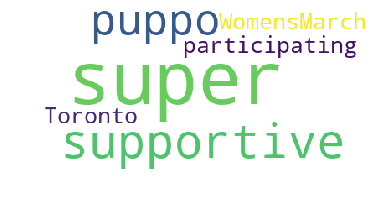

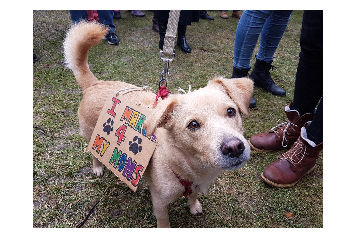

In [68]:
#Downloading Dog Image
image_url = df.dog_picture_url[0]
r = requests.get(image_url)
i = Image.open(BytesIO(r.content))

text = df.tweet_text[0][:74]
cloud = wordcloud.WordCloud(background_color="white").generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.figure()
plt.imshow(i)
plt.axis("off")
plt.show()

### Insight 2: The Retriever family is the one that appear most in tweets!

In [69]:
#Reading data using SQL
df = pd.read_sql('SELECT d.dog_breed_prediction,'
                        'COUNT(d.dog_breed_prediction_confidence)'
                        'FROM twitter_archive_master AS t \n'
                 'JOIN dogs_data_master AS d \n'
                 'ON t.tweet_id = d.tweet_id \n'
                 'GROUP BY 1 \n'
                 'HAVING d.dog_breed_prediction NOT LIKE \'Unknown\' \n'
                 'ORDER BY 2 DESC \n'
                 'LIMIT 10', engine)

#Change dataframe columns names
df.columns = ['dog_breed_prediction','number_of_occurrences']
total_occurrence = sum(df.number_of_occurrences)

In [70]:
#Testing
df.head(20)

,dog_breed_prediction,number_of_occurrences
0,Golden Retriever,76
1,Labrador Retriever,43
2,Pembroke,39
3,Chihuahua,22
4,Chow,22
5,French Bulldog,17
6,Samoyed,17
7,Cocker Spaniel,15
8,Malamute,14
9,German Shepherd,12


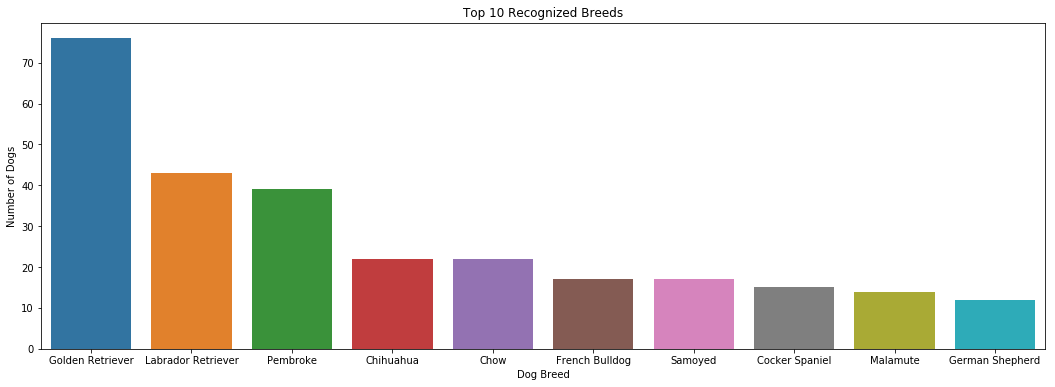

In [71]:
#Bar plot
a4_dims = (18, 6);
fig, ax = plt.subplots(figsize=a4_dims);
ax = sns.barplot(x="dog_breed_prediction", y="number_of_occurrences",data=df);
ax.set(xlabel='Dog Breed', ylabel='Number of Dogs');
plt.title('Top 10 Recognized Breeds');

### Insight 3: With the amount of data we have in hands, we can see that the highest amount of retweets occurred in january for 2017 and in october for 2016

In [72]:
#Reading data using SQL to obtain tweet dates and total amount of retweets and likes
df = pd.read_sql('SELECT STRFTIME(\'%Y\', t.tweet_date) as tweet_year,'
                        'STRFTIME(\'%m\', t.tweet_date) as tweet_month,'
                        'SUM(number_of_retweets) AS total_retweets,'
                        'SUM(number_of_likes) AS total_likes \n'
                 'FROM twitter_archive_master AS t \n'
                 'GROUP BY 1,2', engine)

#Correcting dataframe data types:
df['tweet_year'] = df['tweet_year'].astype(int)
df['tweet_month'] = df['tweet_month'].astype(int)

In [73]:
df.head(20)

,tweet_year,tweet_month,total_retweets,total_likes
0,2016,6,1711,5142
1,2016,7,22604,73598
2,2016,8,209407,606122
3,2016,9,235332,734546
4,2016,10,320184,969853
5,2016,11,247874,767545
6,2016,12,314323,942284
7,2017,1,406773,1280248
8,2017,2,276185,1199227
9,2017,3,247653,1057727


In [74]:
#Fill missing months
missing_values = {'tweet_year':[2016,2016,2016,2016,2016,2017,2017,2017,2017],
                  'tweet_month': [1,2,3,4,5,9,10,11,12],
                  'total_retweets': [0,0,0,0,0,0,0,0,0],
                  'total_likes': [0,0,0,0,0,0,0,0,0]}
#Creating a new dataframe with the missing values
missing_values_df = pd.DataFrame.from_dict(missing_values)
#Reordering the columns
missing_values_df = missing_values_df[['tweet_year','tweet_month','total_retweets','total_likes']]

In [75]:
missing_values_df.head(10)

,tweet_year,tweet_month,total_retweets,total_likes
0,2016,1,0,0
1,2016,2,0,0
2,2016,3,0,0
3,2016,4,0,0
4,2016,5,0,0
5,2017,9,0,0
6,2017,10,0,0
7,2017,11,0,0
8,2017,12,0,0


In [76]:
#Append the new dataframe with the original one
df.append(missing_values_df,ignore_index=True)

,tweet_year,tweet_month,total_retweets,total_likes
0,2016,6,1711,5142
1,2016,7,22604,73598
2,2016,8,209407,606122
3,2016,9,235332,734546
4,2016,10,320184,969853
5,2016,11,247874,767545
6,2016,12,314323,942284
7,2017,1,406773,1280248
8,2017,2,276185,1199227
9,2017,3,247653,1057727


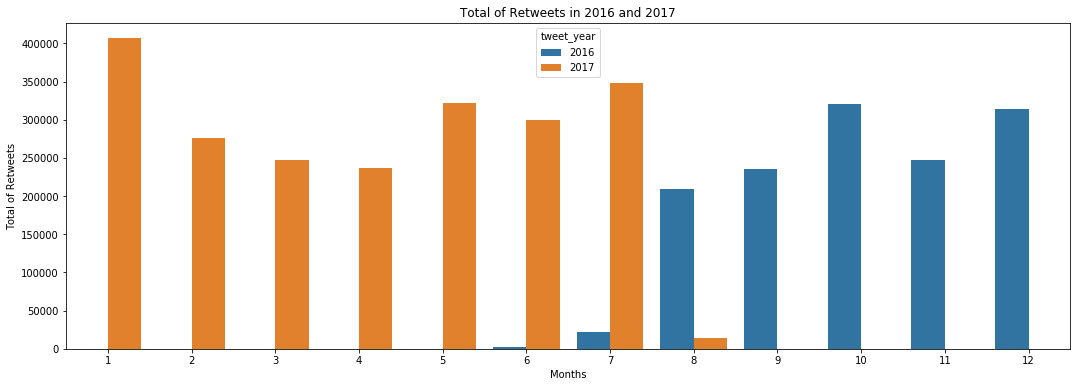

In [77]:
#Bar plot
a4_dims = (18, 6);
fig, ax = plt.subplots(figsize=a4_dims);
ax = sns.barplot(x="tweet_month", y="total_retweets", hue="tweet_year", data=df)
ax.set(xlabel='Months', ylabel='Total of Retweets');
plt.title('Total of Retweets in 2016 and 2017');

# Future Analyses

More cleaning could be done in this data. Some aspects that could be analysed as listed bellow:

- Multiple dog stage classification for the same dog (Ex.: doggo and puppo for the same dog)
- Links and emoticons in the tweet texts
- Outliers in the dog ranking numerator (probably due to typing error)
- Null values for attributes such as dog_stage and dog_picture_url
- Unknown values for dog_stage could be identified through Regular Expressions